# Data analysis 
We analyse climate data from various sources.

In [5]:
import pandas as pd
import numpy as np
import calendar
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#from fbprophet import Prophet# Facebook's Prophet forecasting library

# Standard plotly imports # will be needed just for the latest part of the text
#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
#import cufflinks
#cufflinks.go_offline(connected=True)
#init_notebook_mode(connected=True)

# Pulling the data



The raw data can either be downloaded with this repo or from 
1. NASA - the data are average temperature data per country,
2. data from the World Bank on CO2 emissions.



In [12]:
# Read in the raw temperature and emissions datasets (they are in CSV format) 
raw_t = pd.read_csv('data_climate/GLB.Ts_dSST.csv', skiprows=1)
raw_e = pd.read_csv('data_climate/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_2056655.csv', skiprows=3)

In [11]:
# Investigate how the raw data looks
raw_t.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-.09,-.16,-.23,-.20,-.23,-.19,***,***,-0.14,-.18,-.20
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-.03,-.14,-.21,-.22,-.11,-.10,-.11,-.18,0.03,-.10,-.19
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-.06,-.10,-.25,-.16,-.25,-.11,-.10,.06,-0.10,-.17,-.17
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-.15,-.21,-.14,-.22,-.16,-.19,-.20,-.32,-0.17,-.12,-.19
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-.26,-.27,-.24,-.30,-.29,-.29,-.28,-.13,-0.39,-.34,-.27


In [4]:
raw_e.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,24.670529,24.505835,13.155542,8.351294,8.408363,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046060,0.053604,0.073765,0.074233,0.086292,0.101467,...,0.293837,0.412017,0.350371,0.315602,0.299445,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.097472,0.079038,0.201289,0.192535,0.201003,0.191528,...,1.243406,1.252789,1.330843,1.254617,1.291328,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.122595,5.867130,5.916597,5.900753,5.832170,NaN,NaN,NaN,NaN,NaN


# Wrangling Time Series Data

## Wrangling Temperature

In [13]:
# Create new dataframe with an index for each month
# First create the date range
date_rng = pd.date_range(start='1/1/1880', end='1/03/2019', freq='M')

type(date_rng[0])
### returns 
### pandas._libs.tslibs.timestamps.Timestamp

# Next create the empty DataFrame, which we will populate using the actual data
t = pd.DataFrame(date_rng, columns=['date'])

# Create a column for the anomoly values
t['Avg_Anomaly_deg_C'] = None

# Set the index of the DataFrame to the date column (DateTime index)
t.set_index('date', inplace=True)

# Show the first few elements
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,None
1880-02-29,None
1880-03-31,None
1880-04-30,None
1880-05-31,None


In [14]:
# We only want the monthly data, lets only select that and leave out the seasonal columns 
raw_t = raw_t.iloc[:,:13]
raw_t.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-.09,-.16,-.23,-.20,-.23
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-.03,-.14,-.21,-.22,-.11
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-.06,-.10,-.25,-.16,-.25
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-.15,-.21,-.14,-.22,-.16
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-.26,-.27,-.24,-.30,-.29


In [15]:
# Import relevant libraries
import calendar
from datetime import datetime

# Function definition
def populate_df_with_anomolies_from_row(row):
    year = row['Year']
    # Anomaly values (they seem to be a mixture of strings and floats)
    monthly_anomolies = row.iloc[1:]
    # Abbreviated month names (index names)
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        # Get the last day for each month 
        last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]
        # construct the index with which we can reference our new DataFrame (to populate) 
        date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')
        # Populate / set value @ above index, to anomaly value
        t.loc[date_index] = monthly_anomolies[month]

# Apply function to each row of raw data 
_ = raw_t.apply(lambda row: populate_df_with_anomolies_from_row(row), axis=1)

# Show the first few elements of our newly populated DataFrame
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.2
1880-05-31,-0.12


In [17]:
# Import Numpy, as library meant for large arrays - we will use it that we 
import numpy as np

# Define function to convert values to floats, and return a 'NaN = Not a Number' if this is not possible
def clean_anomaly_value(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN
    
# Apply above function to all anomaly values in DataFrame
t['Avg_Anomaly_deg_C'] = t['Avg_Anomaly_deg_C'].apply(lambda raw_value: clean_anomaly_value(raw_value))

# 'Forward fill' to take care of NaN values
t.fillna(method='ffill', inplace=True)

# Show the first few elements of our newly cleaned DataFrame
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.20
1880-05-31,-0.12


# Plot the data 
Quick and easy - using matplotlib, we will draw prettier graphs later

Inspired taken from 
https://github.com/peter-stuart-turner/time-series-analyses-and-climate-change

Showing and opposing one to another: 


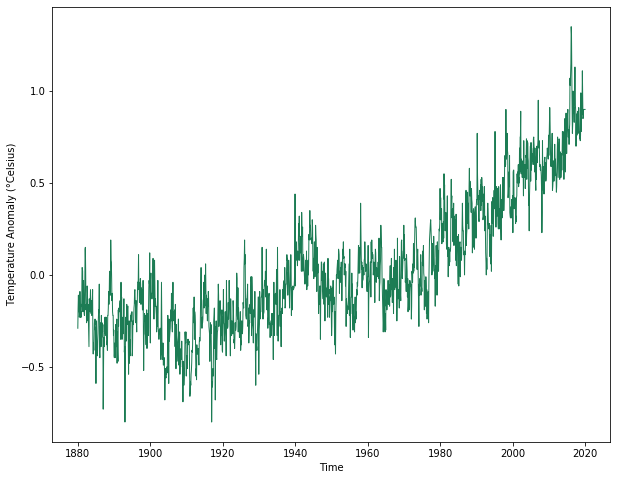

In [18]:

# Import Matplotlib
import matplotlib.pyplot as plt
# Allow for rendering within notebook
%matplotlib inline

# Create figure, title and plot data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t, color='#1C7C54', linewidth=1.0)

In [19]:
# The data can be resampled to a different frequency, 
# lets resample it to years (end-of-year):
t.resample('A').mean().head()


,Avg_Anomaly_deg_C
date,
1880-12-31,-0.187500
1881-12-31,-0.100833
1882-12-31,-0.110000
1883-12-31,-0.191667
1884-12-31,-0.294167


# Apply sliding window-analysis for time-series 

We use moving average (MA) calculation for time-series  <a name="moveav"></a>

1. Why do we need rolling mean? Because we sometimes there are some missing values in time-series, which may lead to missleading results when used in further prediction modules, etc. 
2. For calculating rolling mean for time-series in python is `rolling_mean`
3. Be careful since MA can actually kill some important outliers.


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pyEX as p

ticker = 'AMD'
timeframe = '1y'

plt.plot(t)

rolling_mean = t.rolling(window=20).mean()
rolling_mean40 = t.rolling(window=40).mean()

#rolling_mean2 = data.kneePain.rolling(window=50).mean()plt.plot(df.ds, df.y, label='AMD')
plt.plot(rolling_mean, label='AMD 20 Day SMA', color='orange')
plt.plot(rolling_mean40, label='AMD 40 Day SMA', color='red')
#plt.plot(rolling_mean2, label='AMD 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

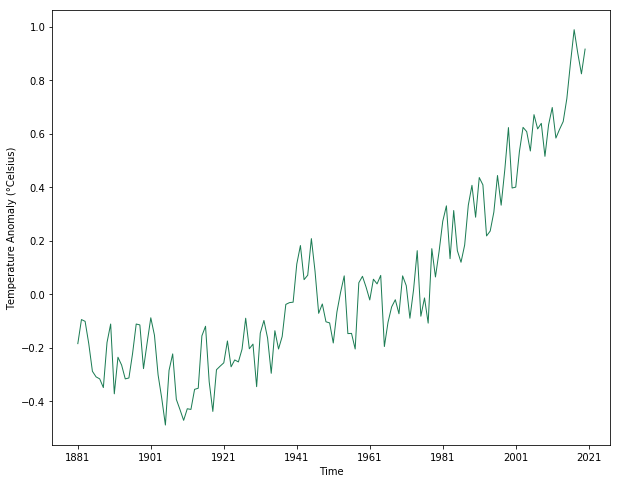

In [11]:
# Now lets visualize our resampled DataFrame

# Import Matplotlib
import matplotlib.pyplot as plt
# Allow for rendering within notebook
%matplotlib inline
# Create figure, title and plot resampled data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t.resample('A').mean(), color='#1C7C54', linewidth=1.0)

## Wrangling Emissions

In [12]:
# Define function to pull value from raw data, using DateIndex from new DataFrame row
def populate_df(row):
    index = str(row['date'].year)
    value = raw_e_world.loc[index]
    return value
  
# Select just the co2 emissions for the 'world', and the columns for the years 1960-2018 
raw_e_world = raw_e[raw_e['Country Name']=='World'].loc[:,'1960':'2018']

# 'Traspose' the resulting slice, making the columns become rows and vice versa
raw_e_world = raw_e_world.T
raw_e_world.columns = ['value']

# Create a new DataFrame with a daterange the same the range for.. 
# the Temperature data (after resampling to years)
date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
e = pd.DataFrame(date_rng, columns=['date'])

# Populate the new DataFrame using the values from the raw data slice
v = e.apply(lambda row: populate_df(row), axis=1)
e['Global CO2 Emissions per Capita'] = v
e.set_index('date', inplace=True)
e.head()

,Global CO2 Emissions per Capita
date,
1960-12-31,3.099013
1961-12-31,3.069727
1962-12-31,3.140511
1963-12-31,3.244499
1964-12-31,3.360596


In [13]:
# Illustrate how the above DataFrame can be filtered for values after 2011
e[e.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,4.996211
2013-12-31,4.987739
2014-12-31,4.969974
2015-12-31,NaN
2016-12-31,NaN
2017-12-31,NaN
2018-12-31,NaN


In [14]:
# Deal with the NaNs by 'forward filling'
e.fillna(method='ffill', inplace=True)

In [15]:
# Check that there are no longer NaNs at the end 
e[e.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,4.996211
2013-12-31,4.987739
2014-12-31,4.969974
2015-12-31,4.969974
2016-12-31,4.969974
2017-12-31,4.969974
2018-12-31,4.969974


In [16]:
e['1984-01-04':'1990-01-06']

,Global CO2 Emissions per Capita
date,
1984-12-31,4.019671
1985-12-31,4.068895
1986-12-31,4.118996
1987-12-31,4.146842
1988-12-31,4.221216
1989-12-31,4.238247


# Final DataFrames

In [17]:
# Temperature anomalies
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.19
1880-05-31,-0.11


In [18]:
# Temperature anomalies resampled to end-of-year
t.resample('A').mean().head()

,Avg_Anomaly_deg_C
date,
1880-12-31,-0.185000
1881-12-31,-0.095000
1882-12-31,-0.101667
1883-12-31,-0.185000
1884-12-31,-0.288333


In [19]:
# CO2 emissions
e.head()

,Global CO2 Emissions per Capita
date,
1960-12-31,3.099013
1961-12-31,3.069727
1962-12-31,3.140511
1963-12-31,3.244499
1964-12-31,3.360596


# Visualizing Time Series Data

## Plotting Temperature with Matplotlib

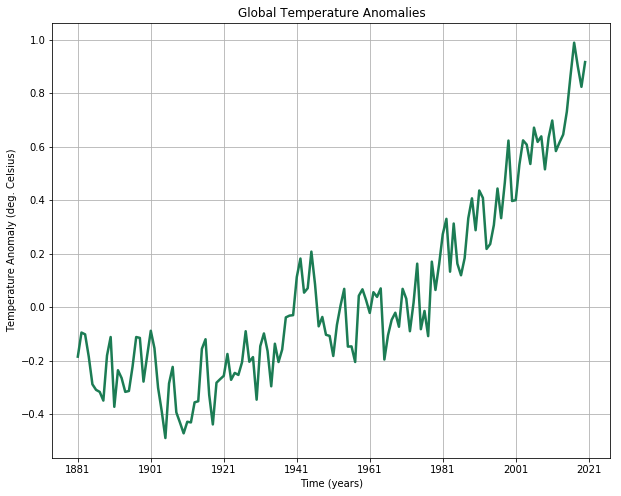

In [20]:
# import Matplotlib
import matplotlib.pyplot as plt
# Allow for graphs to be displayed in Jupyter notebook
%matplotlib inline

# Resample or temperature data to years (end-of-year)
t_resampled = t.resample('A').mean()

# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot temperature data with specific colour and line thickness
ax.plot(t_resampled, color='#1C7C54', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Temperature Anomaly (deg. Celsius)',
       title='Global Temperature Anomalies')

# Enable grid
ax.grid()


## Plotting Emissions with Matplotlib

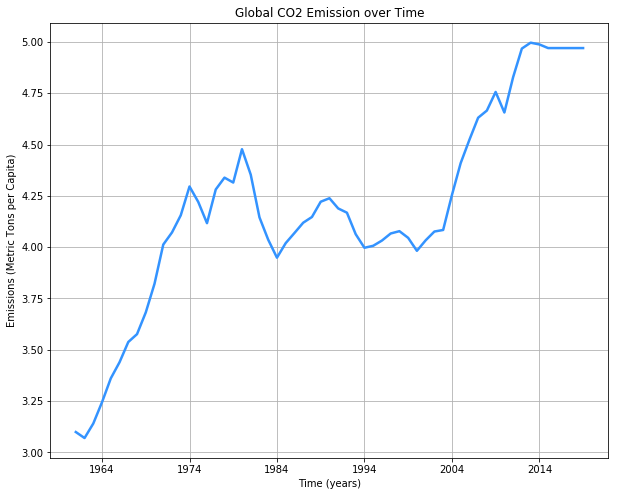

In [21]:
# import Matplotlib
import matplotlib.pyplot as plt
# Allow for graphs to be displayed in Jupyter notebook
%matplotlib inline

# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot co2 emissions data with specific colour and line thickness
ax.plot(e, color='#3393FF', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Emissions (Metric Tons per Capita)',
       title='Global CO2 Emission over Time')

# Enable grid
ax.grid()

## Plotting Temperature with Plotly

In [22]:
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [23]:
t.resample('A').mean().iplot(kind='line', xTitle='Time (years)', color='#1C7C54',
                  yTitle='Temperature Anomaly (deg. Celsius)', title='Global Temperature Anomalies')

## Plotting Emissions with Plotly

In [24]:
e.iplot(kind='line', xTitle='Time (years)', color='#3393FF',
                  yTitle='Emissions (Metric Tons per Capita)', title='Global CO2 Emission over Time')

# Timeseries Correlation

## Granger Causality

## Dynamic Time Warping

In [ ]:
# The above will be available in another post soon! The post will also use these same two time series.

# Time Series Modelling and Forecasting

## Facebook Prophet

In [30]:
t_prophet = pd.DataFrame()
t_prophet['ds'] = t.index
t_prophet['y'] = t['Avg_Anomaly_deg_C'].values

In [31]:
m = Prophet()
m.fit(t_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/pst-home/anaconda3/envs/data_science/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [32]:
# Make future dataframes
future = m.make_future_dataframe(freq='m', periods=100*12)
forecast = m.predict(future)

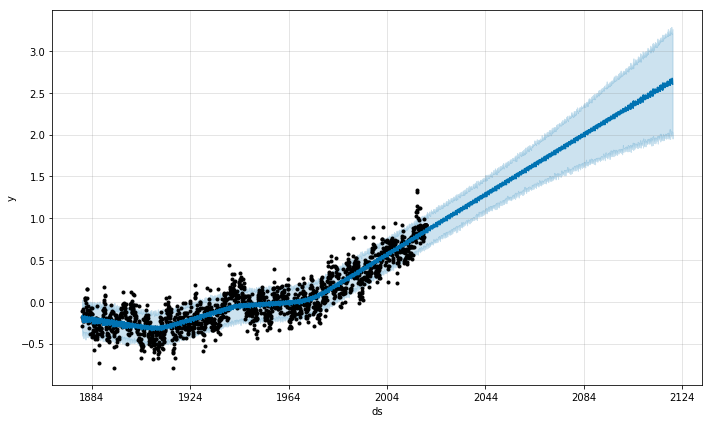

In [33]:
m.plot(forecast);

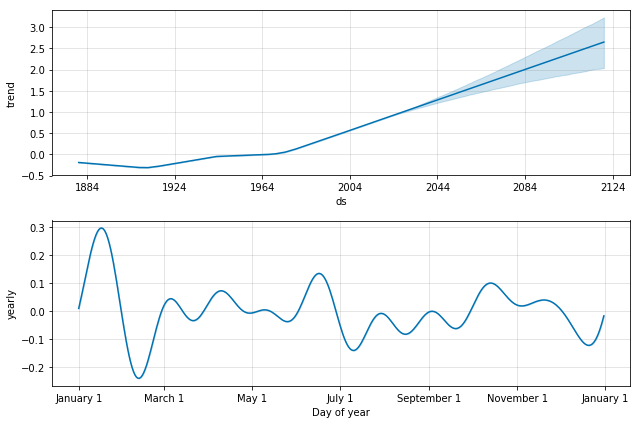

In [34]:
m.plot_components(forecast);

## Autoregressive Integrated Moving Average (ARIMA)

In [ ]:
# This will also be available in a future post

# THE END